<h1>Импорт библиотек

In [89]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

<h1>Задача 1. Дан набор из $p$ матриц размерностью $(n, n)$ и $p$ векторов размерностью $(n, 1)$, найти сумму произведений матриц на векторы. Написать тесты для кода

In [221]:
def sum_vect(M, V):
    '''
    M - матрицы (n, n)
    V - векторы (n, 1)
    Гарантируется, что len(M) == len(V)
    '''
    sum = 0
    for e in range(len(M)):
        sum += np.dot(M[e],V[e])
    
    return sum

print("Тест 1")
print(sum_vect([np.array([1,2,3,4]).reshape(2,2),np.array([5,6,7,8]).reshape(2,2)],
               [np.array([5,6]).reshape(2,1), np.array([7,8]).reshape(2,1)]))
print()
print("Тест 2")
print(sum_vect([np.array([1,1,2,2]).reshape(2,2),np.array([1,1,2,2]).reshape(2,2)],
               [np.array([5,6]).reshape(2,1), np.array([7,8]).reshape(2,1)]))

Тест 1
[[100]
 [152]]

Тест 2
[[26]
 [52]]


<h1>Задача 2. Дана матрица M, напишите функцию, которая бинаризует матрицу по некоторому threshold (то есть, все значения большие threshold становятся равными 1, иначе 0). Напишите тесты для кода

In [102]:
def binar(M, threshold=0.5):
    M = np.where(M > threshold,1,0)
    return M
    
print(binar(np.array([5,2,3])), "= [1 1 1]")
print(binar(np.array([3,-2,-3])), "= [1 0 0]")

[1 1 1] = [1 1 1]
[1 0 0] = [1 0 0]


<h1>Задача 3. Напишите функцию, которая возвращает уникальные элементы из каждой строки матрицы. Напишите такую же функцию, но для столбцов. Напишите тесты для кода

In [138]:
def uniq_str(m):
    for i in range(len(m)):
        print("Строка {}: {}".format(m[i], np.unique(m[i],axis=0)))

def uniq_colum(m):

    for i in range(len(m.T)):
        print("Строка {}: {}".format(m.T[i], np.unique(m.T[i],axis=0)))

uniq_str(np.array([[1,1],[2,3],[1,1]]))
print()
uniq_colum(np.array([[1,1],[2,3],[1,1]]))

Строка [1 1]: [1]
Строка [2 3]: [2 3]
Строка [1 1]: [1]

Строка [1 2 1]: [1 2]
Строка [1 3 1]: [1 3]


<h1>Задача 4. Напишите функцию, которая заполняет матрицу с размерами $(m, n)$ случайными числами, распределенными по нормальному закону. Затем считает мат. ожидание и дисперсию для каждого из столбцов и строк, а также строит для каждой строки и столбца гистограмму значений (использовать функцию hist из модуля matplotlib.plot)

Строки
Строка [ 0.0236467   0.8712817  -1.61488502 -1.12053644  0.29757068]: мат. ожидание -0.30858447631241226; дисперсия 0.8471145829233155; 
Строка [-0.85978203  0.32914033 -2.36967591 -0.74424976  0.7005822 ]: мат. ожидание -0.5887970332647848; дисперсия 1.1548471617252447; 
Строка [-1.92751364 -0.68325504 -0.10584989  0.7442823   0.14170942]: мат. ожидание -0.36612537323525135; дисперсия 0.8194298502540235; 

Столбцы
Столбец [ 0.0236467  -0.85978203 -1.92751364]: мат. ожидание -0.9212163221897978; дисперсия 0.63639153669559; 
Столбец [ 0.8712817   0.32914033 -0.68325504]: мат. ожидание 0.17238899387471177; дисперсия 0.4150495702751873; 
Столбец [-1.61488502 -2.36967591 -0.10584989]: мат. ожидание -1.3634702734410535; дисперсия 0.8857560590676211; 
Столбец [-1.12053644 -0.74424976  0.7442823 ]: мат. ожидание -0.37350130304633405; дисперсия 0.648318698192419; 
Столбец [0.29757068 0.7005822  0.14170942]: мат. ожидание 0.3799541001150595; дисперсия 0.05544997888159655; 


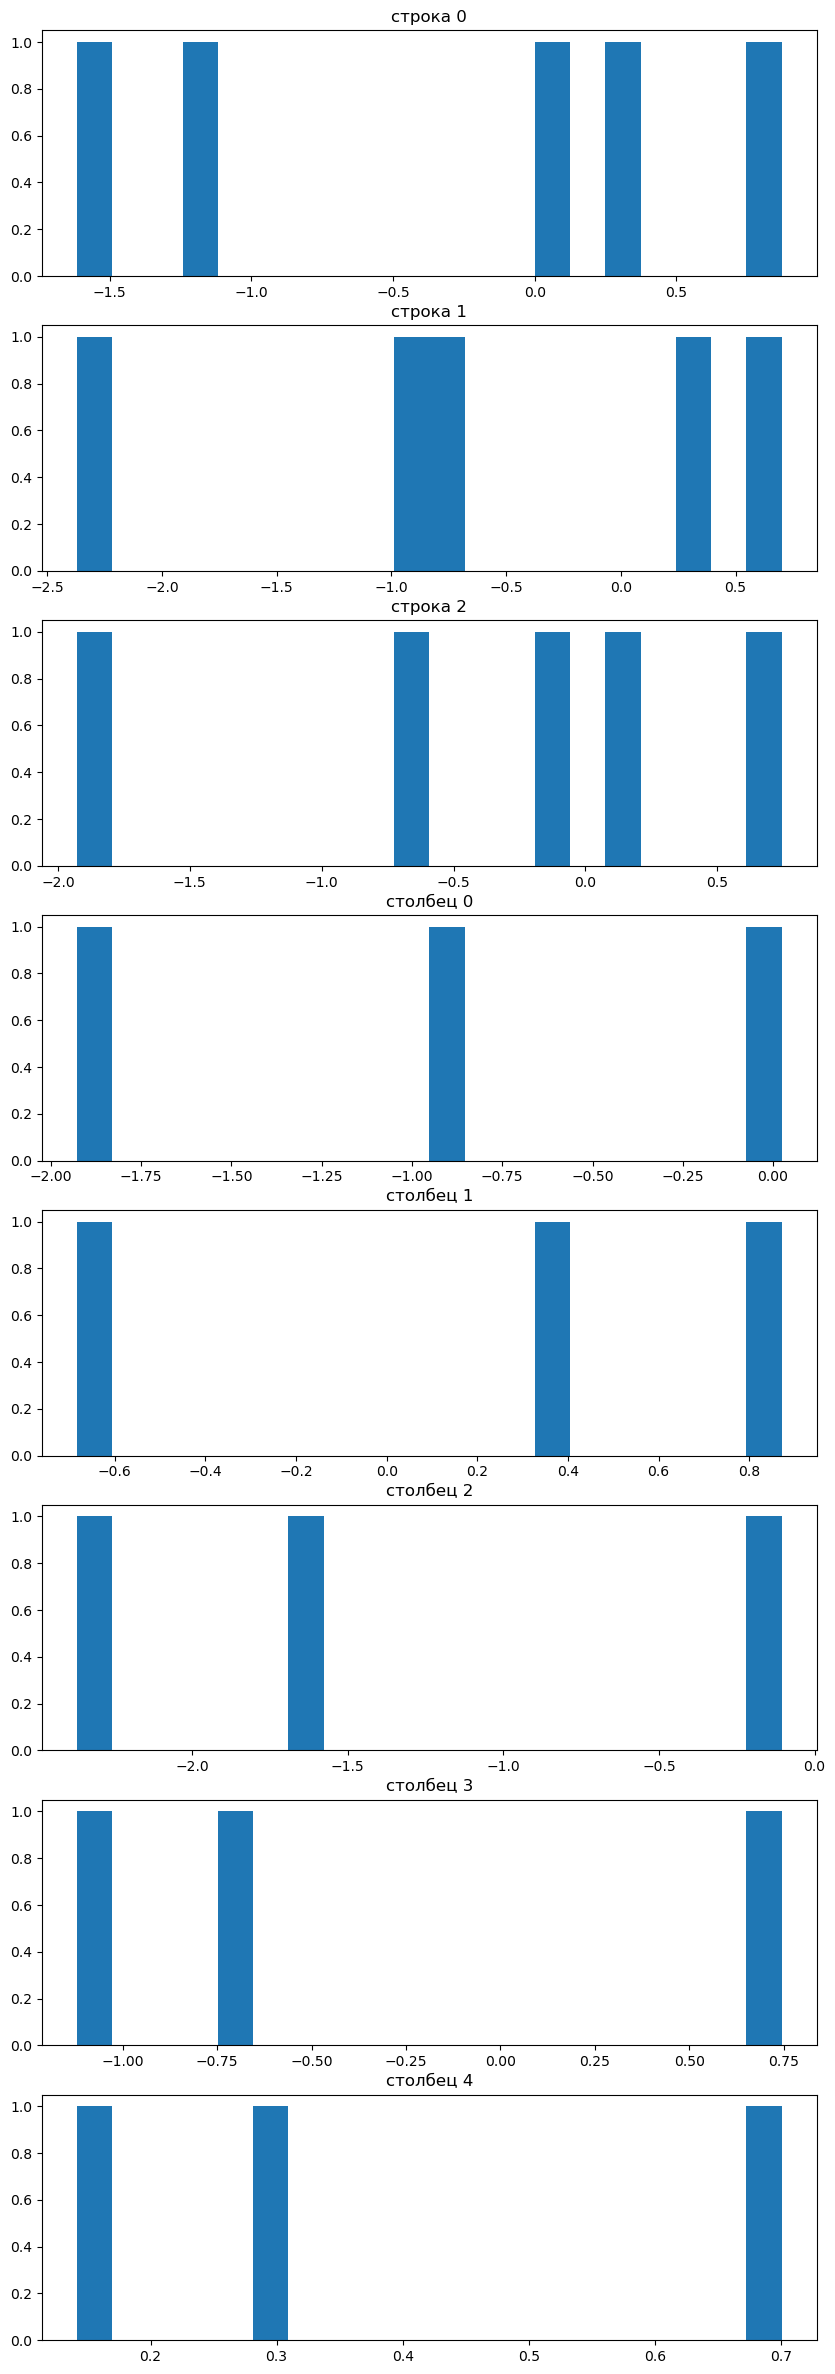

In [151]:
def norm_M(m,n):
    normal_array = np.random.normal(0.0, 1.0, size=(m,n))
    print("Строки")
    for a in range(len(normal_array)):
        print("Строка {}: мат. ожидание {}; дисперсия {}; ".format(normal_array[a], np.mean(normal_array[a]),np.var(normal_array[a])))
    
    print()
    
    print("Столбцы")
    for a in range(len(normal_array.T)):
        print("Столбец {}: мат. ожидание {}; дисперсия {}; ".format(normal_array.T[a], np.mean(normal_array.T[a]),np.var(normal_array.T[a])))
    
    fig, axes = plt.subplots(m+n,figsize=(5, 5))
    
    fig.set_figheight(30)
    fig.set_figwidth(10)
    for a in range(len(axes)):
        if a < m:
            axes[a].hist(normal_array[a],bins=20)
            axes[a].set_title("строка {}".format(a))
        else:
            axes[a].hist(normal_array.T[a-m],bins=20)
            axes[a].set_title("столбец {}".format(a-m))
    
    
    
norm_M(3,5)

<h1>Задача 5. Напишите функцию, которая заполняет матрицу $(m, n)$ в шахматном порядке заданными числами $a$ и $b$. Напишите тесты для кода

In [217]:
def Mat_chess(a, b, c, d):
    arr = np.zeros(shape=(c,d))
    
    for i in range(c):
        for e in range(d):
            if (i+e)%2 == 0:
                arr[i][e] = a
            else:
                arr[i][e] = b
    
    print(arr)

chess(5,10,1,0)

[[1. 0. 1. 0. 1. 0. 1. 0. 1. 0.]
 [0. 1. 0. 1. 0. 1. 0. 1. 0. 1.]
 [1. 0. 1. 0. 1. 0. 1. 0. 1. 0.]
 [0. 1. 0. 1. 0. 1. 0. 1. 0. 1.]
 [1. 0. 1. 0. 1. 0. 1. 0. 1. 0.]]


<h1>Задача 6. Напишите функцию, которая отрисовывает прямоугольник с заданными размерами (a, b) на изображении размера (m, n), цвет фона задайте в схеме RGB, как и цвет прямоугольника. Цвета также должны быть параметрами функции. Напишите аналогичную функцию но для овала с полуосями a и b. Напишите тесты для кода.
Примечание: уравнение эллипса (границы овала) можно записать как:
<h1>$\frac{(x-x_0)^2}{a^2}+\frac{(y-y_0)^2}{b^2}=1$

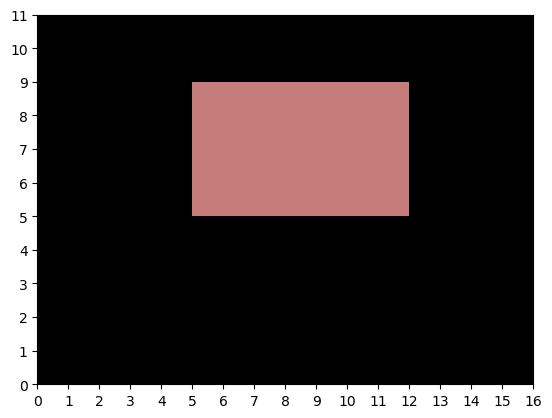

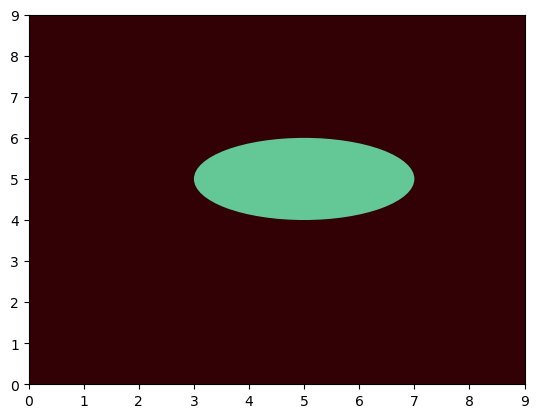

In [215]:
from matplotlib.patches import Rectangle, Ellipse

def rectangle(a, b, c, d, rectangle_color, background_color):
    fig,ax = plt.subplots(1,1)
    ax.set_facecolor(background_color)
    ax.set_xticks(np.arange(0,c+1,1))
    ax.set_yticks(np.arange(0,d+1,1))
    ax.add_patch(Rectangle((5, 5), a, b, fc=rectangle_color))

def ellipse(a, b, c, d, ellipse_color, background_color):
    fig,ax = plt.subplots(1,1)
    ax.set_facecolor(background_color)
    ax.set_xticks(np.arange(0,c+1,1))
    ax.set_yticks(np.arange(0,d+1,1))
    ax.add_patch(Ellipse((5, 5), a, b, fc=ellipse_color))

rectangle(7,4,16,11,(199/255,124/255,124/255),(0/255,0/255,0/255))
ellipse(4,2,9,9,(100/255,200/255,150/255),(50/255,1/255,5/255))

<h1>Задача 7. Дан некий временной ряд. Для данного ряда нужно найти его: математическое ожидание, дисперсию, СКО, найти все локальные максимумы и минимумы (локальный максимум - это точка, которая больше своих соседних точек, а локальный минимум - это точка, которая меньше своих соседей), а также вычислить для данного ряда другой ряд, получаемый методом скользящего среднего с размером окна $p$.
<h1>Примечание: метод скользящего среднего подразумевает нахождение среднего из подмножетсва ряда размером $p$

In [216]:
def get_params(arr,p):
    mean = np.mean(arr[:,1])
    print("Мат. ожидание: {}".format(mean))
    
    var = np.var(arr[:,1])
    print("Дисперсия: {}".format(var))
    
    std = var**0.5
    print("СКО: {}".format(std))
    
    local_min = []
    local_max = []
    data = arr[:,1].ravel()
    for a in range(1,len(data)-1):
        if data[a] < data[a-1] and data[a] < data[a+1]:
            local_min.append(data[a])
        elif data[a] > data[a-1] and data[a] > data[a+1]:
            local_max.append(data[a])
    print("Локальные минимумы: {}".format(local_min))
    print("Локальные максимумы: {}".format(local_max))
    
    moving_p = [0]*(p-1)
    for a in range(0,len(data)):
        if a+p <= len(data):
            moving_p.append(sum(data[a:a+p])/len(data[a:a+p]))
    print("Ряд, полученный методом скользящего среднего с размером окна p: {}".format(moving_p))
    
time_series = np.array([[np.datetime64('1949-01-01'),112],[np.datetime64('1949-02-01'),118],[np.datetime64('1949-03-01'),132],
                        [np.datetime64('1949-04-01'),129],[np.datetime64('1949-05-01'),121]])

print(time_series)
get_params(time_series,3)

[[numpy.datetime64('1949-01-01') 112]
 [numpy.datetime64('1949-02-01') 118]
 [numpy.datetime64('1949-03-01') 132]
 [numpy.datetime64('1949-04-01') 129]
 [numpy.datetime64('1949-05-01') 121]]
Мат. ожидание: 122.4
Дисперсия: 53.040000000000006
СКО: 7.28285658241325
Локальные минимумы: []
Локальные максимумы: [132]
Ряд, полученный методом скользящего среднего с размером окна p: [0, 0, 120.66666666666667, 126.33333333333333, 127.33333333333333]


<h1> Задача 8. Дан некоторый вектор с целочисленными метками классов, напишите функцию, которая выполняет one-hot-encoding для данного вектора
<h1> One-hot-encoding - представление, в котором на месте метки некоторого класса стоит 1, в остальных позициях стоит 0. Например для вектора [0, 2, 3, 0] one-hot-encoding выглядит как: [[1, 0, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1], [1, 0, 0, 0]]

In [165]:
def get_ohe_array(arr):
    arr_new = np.zeros(shape=(len(arr), len(arr)))
    for a in range(len(arr_new)):
        arr_new[a][arr[a]] = 1
    return arr_new.T

print(get_ohe_array(np.array([0, 2, 3, 0])))

[[1. 0. 0. 1.]
 [0. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]]
